# 07_05: Simulating data

In [1]:
import math
import collections
import dataclasses
import datetime

import numpy as np
import pandas as pd
import matplotlib.pyplot as pp

In [2]:
import random
import faker

In [3]:
fake = faker.Faker()

In [4]:
fake.name()

'Brianna Cox'

In [5]:
fake.address()

'USCGC Romero\nFPO AE 56115'

In [6]:
fake.date_of_birth()

datetime.date(1921, 1, 7)

In [7]:
fake.city()

'East Matthewtown'

In [8]:
fake.state_abbr()

'LA'

In [9]:
music_genres = ['Rock', 'Pop', 'Jazz', 'Hip Hop', 'Country', 'Electronic', 'Blues', 
                'Reggae', 'Metal', 'Folk', 'Soul', 'R&B', 'Punk', 'Indie', 'Alternative']

In [10]:
def artist():
    return {'name': fake.name(),
            'dob': pd.to_datetime(fake.date_of_birth(minimum_age=16, maximum_age=80)), # from Python to pandas date object
            'birthplace': f'{fake.city()} {fake.state_abbr()}',
            'genre': fake.random_element(music_genres)}

In [11]:
artist()

{'name': 'Mark Johnson',
 'dob': Timestamp('1991-04-11 00:00:00'),
 'birthplace': 'Salazarmouth VT',
 'genre': 'Blues'}

In [12]:
artists = pd.DataFrame([artist() for i in range(100)])
artists.index.name = 'artist_id'

In [13]:
artists

,name,dob,birthplace,genre
artist_id,,,,
0,Matthew Howard MD,1978-02-17,Port Perrymouth DE,Reggae
1,Duane Williams,1983-06-29,Antoniomouth MS,R&B
2,Olivia Rich,1974-06-27,Brittanyland WY,Rock
3,Dennis Flores,1995-02-12,Hamiltonshire LA,Electronic
4,Rebecca Johnson PhD,1969-02-08,West Cynthiatown MO,Indie
...,...,...,...,...
95,Betty Kaufman,1951-02-03,Catherinetown MT,Punk
96,Brian Castro,1998-06-25,West Markland NE,Folk
97,Clifford Perez,2007-05-29,New Albert AR,R&B


In [14]:
def song():
    artist = fake.random_element(artists.index)
    
    return {'title': fake.text(max_nb_chars=20)[:-1], # skip the final period
            'release': pd.to_datetime(fake.past_date(start_date="-2y")), # get dates in the last two years
            'artist_id': artist,
            'genre': artists.loc[artist, 'genre']}

In [15]:
song()

{'title': 'Onto check once',
 'release': Timestamp('2023-06-03 00:00:00'),
 'artist_id': 90,
 'genre': 'Punk'}

In [16]:
song()

{'title': 'Time knowledge',
 'release': Timestamp('2023-07-24 00:00:00'),
 'artist_id': 49,
 'genre': 'Soul'}

In [17]:
songs = pd.DataFrame([song() for i in range(500)])
songs.index.name = 'song_id'

In [18]:
songs

,title,release,artist_id,genre
song_id,,,,
0,Everyone identify,2023-02-05,19,Punk
1,Material commercial,2024-03-07,81,Metal
2,Boy beat similar,2022-10-28,16,Alternative
3,Board film hour,2023-09-29,51,Punk
4,Personal very,2023-12-11,91,R&B
...,...,...,...,...
495,Perhaps carry,2024-01-19,25,Metal
496,Blood seem assume,2023-08-27,99,Electronic
497,Article artist,2022-12-09,27,Electronic


In [19]:
songs.loc[0].release

Timestamp('2023-02-05 00:00:00')

In [20]:
duration = np.random.randint(10, 50)

In [21]:
songs.loc[0].release + pd.Timedelta(weeks=duration)

Timestamp('2023-04-16 00:00:00')

In [22]:
t = pd.date_range(start=songs.loc[0].release,
                  end=songs.loc[0].release + pd.Timedelta(weeks=duration),
                  freq='W-MON')
t

DatetimeIndex(['2023-02-06', '2023-02-13', '2023-02-20', '2023-02-27',
               '2023-03-06', '2023-03-13', '2023-03-20', '2023-03-27',
               '2023-04-03', '2023-04-10'],
              dtype='datetime64[ns]', freq='W-MON')

In [23]:
initial_plays = np.random.randint(500000, 1000000)

In [24]:
cleanplays = initial_plays * np.linspace(1, 1/duration, duration)

In [25]:
noisyplays = cleanplays * np.random.uniform(0.8, 1.2, duration)

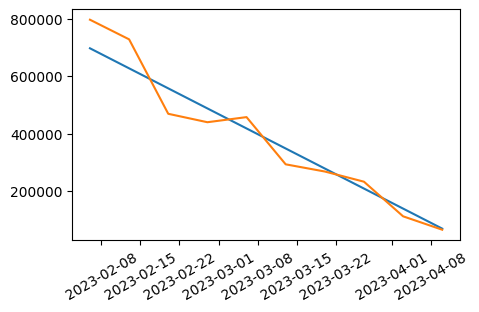

In [26]:
pp.figure(figsize=(5,3))
pp.plot(t, cleanplays)
pp.plot(t, noisyplays)
pp.xticks(rotation=30); # angled tick labels are more readable

In [27]:
def history(song_id):
    duration = np.random.randint(10, 50)

    t = pd.date_range(start=songs.loc[song_id].release,
                      end=songs.loc[song_id].release + pd.Timedelta(weeks=duration),
                      freq='W-MON')

    initial_plays = np.random.randint(500000, 1000000)
    plays = initial_plays * np.linspace(1, 0, duration) * np.random.uniform(0.8, 1.2, duration)
    
    return pd.DataFrame({'song_id': song_id, 'plays': plays.astype(int), 'date': t[:duration]})

In [28]:
history(1).head()

,song_id,plays,date
0,1,550074,2024-03-11
1,1,524848,2024-03-18
2,1,562456,2024-03-25
3,1,547964,2024-04-01
4,1,401800,2024-04-08


In [29]:
histories = pd.concat([history(song_id) for song_id in songs.index], axis=0).reset_index().rename(columns={'index': 'week'})

In [30]:
histories

,week,song_id,plays,date
0,0,0,834919,2023-02-06
1,1,0,779109,2023-02-13
2,2,0,772215,2023-02-20
3,3,0,712853,2023-02-27
4,4,0,566123,2023-03-06
...,...,...,...,...
14569,30,499,65979,2025-02-03
14570,31,499,49308,2025-02-10
14571,32,499,31469,2025-02-17
14572,33,499,16352,2025-02-24


In [31]:
histories = histories[(histories.date > pd.Timestamp.today() - pd.Timedelta(weeks=52)) &
                      (histories.date <= pd.Timestamp.today())]

In [32]:
histories = histories.sort_values(['date', 'plays'], ascending=[True, False])

In [33]:
topten = histories.groupby('date').head(10).set_index('date')
topten

,week,song_id,plays
date,,,
2023-10-30,0,404,890081
2023-10-30,4,144,879150
2023-10-30,6,387,874397
2023-10-30,2,321,873989
2023-10-30,4,481,823667
...,...,...,...
2024-10-21,1,102,804188
2024-10-21,4,437,732844
2024-10-21,6,429,731102


In [34]:
topten.loc['2024-09-09']

,week,song_id,plays
date,,,
2024-09-09,2,154,1054046
2024-09-09,0,442,961834
2024-09-09,2,121,935644
2024-09-09,5,57,931612
2024-09-09,0,429,866276
2024-09-09,5,333,848033
2024-09-09,4,434,844963
2024-09-09,4,18,816908
2024-09-09,1,365,793340


In [35]:
topten['rank'] = topten.groupby('date').plays.rank(ascending=False)

In [36]:
topten

,week,song_id,plays,rank
date,,,,
2023-10-30,0,404,890081,1.0
2023-10-30,4,144,879150,2.0
2023-10-30,6,387,874397,3.0
2023-10-30,2,321,873989,4.0
2023-10-30,4,481,823667,5.0
...,...,...,...,...
2024-10-21,1,102,804188,6.0
2024-10-21,4,437,732844,7.0
2024-10-21,6,429,731102,8.0


In [37]:
songs.head()

,title,release,artist_id,genre
song_id,,,,
0,Everyone identify,2023-02-05,19,Punk
1,Material commercial,2024-03-07,81,Metal
2,Boy beat similar,2022-10-28,16,Alternative
3,Board film hour,2023-09-29,51,Punk
4,Personal very,2023-12-11,91,R&B


In [38]:
artists.head()

,name,dob,birthplace,genre
artist_id,,,,
0,Matthew Howard MD,1978-02-17,Port Perrymouth DE,Reggae
1,Duane Williams,1983-06-29,Antoniomouth MS,R&B
2,Olivia Rich,1974-06-27,Brittanyland WY,Rock
3,Dennis Flores,1995-02-12,Hamiltonshire LA,Electronic
4,Rebecca Johnson PhD,1969-02-08,West Cynthiatown MO,Indie


In [39]:
merged = topten.merge(songs, left_on='song_id', right_index=True) \
               .merge(artists.name, left_on='artist_id', right_index=True)
merged

,week,song_id,plays,rank,title,release,artist_id,genre,name
date,,,,,,,,,
2023-10-30,0,404,890081,1.0,Performance,2023-10-28,25,Metal,Erica Mills
2023-10-30,4,144,879150,2.0,Student necessary,2023-09-26,27,Electronic,Nicole Santos
2023-10-30,6,387,874397,3.0,Hold free new,2023-09-16,22,Country,Joe Frazier
2023-10-30,2,321,873989,4.0,Thank learn dog,2023-10-13,16,Alternative,Anthony Townsend
2023-10-30,4,481,823667,5.0,Local she crime,2023-09-28,67,Rock,Scott Brown
...,...,...,...,...,...,...,...,...,...
2024-10-21,1,102,804188,6.0,Through nation,2024-10-12,42,Folk,Wanda Chen
2024-10-21,4,437,732844,7.0,Despite lay wall,2024-09-19,61,Pop,Jodi Espinoza
2024-10-21,6,429,731102,8.0,Move base edge past,2024-09-06,90,Punk,Anthony Douglas


In [40]:
first = merged.query('rank == 1').groupby('name').title.count().sort_values(ascending=False).head()
first

name
David Graham        5
Jodi Espinoza       4
Wanda Chen          4
Andrew Everett      3
Anthony Townsend    3
Name: title, dtype: int64

In [41]:
merged[(merged['rank'] == 1) & (merged['name'] == first.index[0])]

,week,song_id,plays,rank,title,release,artist_id,genre,name
date,,,,,,,,,
2024-08-26,0,154,1090571,1.0,Listen right lose,2024-08-25,89,Hip Hop,David Graham
2024-09-02,1,154,1008082,1.0,Listen right lose,2024-08-25,89,Hip Hop,David Graham
2024-09-09,2,154,1054046,1.0,Listen right lose,2024-08-25,89,Hip Hop,David Graham
2024-09-16,3,154,1073781,1.0,Listen right lose,2024-08-25,89,Hip Hop,David Graham
2024-09-23,4,154,934580,1.0,Listen right lose,2024-08-25,89,Hip Hop,David Graham


In [42]:
merged.to_hdf('songtables.h5', key='topten')
artists.to_hdf('songtables.h5', key='artists')
songs.to_hdf('songtables.h5', key='songs')

In [43]:
h5 = pd.HDFStore('songtables.h5')

In [44]:
h5.keys()

['/artists', '/songs', '/topten']

In [45]:
h5['/artists']

,name,dob,birthplace,genre
artist_id,,,,
0,Matthew Howard MD,1978-02-17,Port Perrymouth DE,Reggae
1,Duane Williams,1983-06-29,Antoniomouth MS,R&B
2,Olivia Rich,1974-06-27,Brittanyland WY,Rock
3,Dennis Flores,1995-02-12,Hamiltonshire LA,Electronic
4,Rebecca Johnson PhD,1969-02-08,West Cynthiatown MO,Indie
...,...,...,...,...
95,Betty Kaufman,1951-02-03,Catherinetown MT,Punk
96,Brian Castro,1998-06-25,West Markland NE,Folk
97,Clifford Perez,2007-05-29,New Albert AR,R&B
